In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


This dataset has 28 x 28 images. The rows of the dataset are the labels for each image and the columns are the pixel values.

Data exploration to check if the number of data points per label/sign has a similar distribution in the training set:

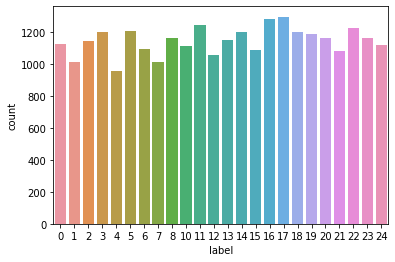

In [4]:
sns.countplot(train['label'])

Get the data in the right format

In [5]:
train_labels = train['label']
train.drop('label', axis = 1, inplace = True)

In [6]:
train_images = train.values
train_images = np.array([np.reshape(i, (28, 28)) for i in train_images])
train_images = np.array([i.flatten() for i in train_images])

In [7]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
train_labels = label_binrizer.fit_transform(train_labels)

In [8]:
train_images.shape

(27455, 784)

In [9]:
train_labels.shape

(27455, 24)

How the train images look:

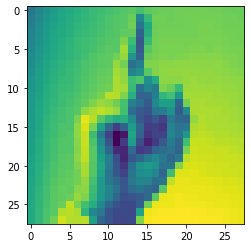

In [10]:
plt.imshow(train_images[0].reshape(28,28))

In [11]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

In [12]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [13]:
test_labels = label_binrizer.fit_transform(test_labels)

In [14]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
test_images.shape

(7172, 28, 28, 1)

In [16]:
test_labels.shape

(7172, 24)

Split the train data into a train/test split to train the CNN model:
(the x_train and y_train need to be of the same dimensions to train model - which the given train (4D) and test (2D) aren't)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size = 0.3, random_state = 101)

Normalize:

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**CNN Model**

In [20]:
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(layers.Dense(24, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [23]:
epochs = 30
batch_size = 120

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


Train on 19218 samples, validate on 8237 samples
Epoch 1/30
19218/19218 [==============================] - 18s 926us/step - loss: 2.5535 - accuracy: 0.2235 - val_loss: 1.4000 - val_accuracy: 0.5654
Epoch 2/30
19218/19218 [==============================] - 21s 1ms/step - loss: 1.1566 - accuracy: 0.6073 - val_loss: 0.7654 - val_accuracy: 0.7675
Epoch 3/30
19218/19218 [==============================] - 18s 957us/step - loss: 0.6838 - accuracy: 0.7676 - val_loss: 0.4214 - val_accuracy: 0.8695
Epoch 4/30
19218/19218 [==============================] - 18s 933us/step - loss: 0.4245 - accuracy: 0.8557 - val_loss: 0.2515 - val_accuracy: 0.9256
Epoch 5/30
19218/19218 [==============================] - 19s 977us/step - loss: 0.2696 - accuracy: 0.9122 - val_loss: 0.1525 - val_accuracy: 0.9630
Epoch 6/30
19218/19218 [==============================] - 18s 927us/step - loss: 0.1899 - accuracy: 0.9398 - val_loss: 0.0908 - val_accuracy: 0.9818
Epoch 7/30
19218/19218 [==============================] - 

In [24]:
predictions = model.predict(test_images)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions.round())

0.8457891801450084

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

7172/7172 [==============================] - 2s 323us/step
Test accuracy: 0.8457891941070557
